In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [196]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [197]:
#add test and train data    
data = test.append(train)
print len(test) +len(train)
len(data)
data = train

17379


# Variable Identification

In [198]:
data.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered',
       u'count'],
      dtype='object')

In [199]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [200]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1.0,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1.0,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1.0,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1.0,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1.0,9.84,14.395,75,0.0,0,1,1


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10883 non-null float64
temp          10878 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 978.1+ KB


# Missing value Analysis

In [202]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       3
temp          8
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [203]:
print data.weather.value_counts()
print data.weather.isna().sum()

1.0    7190
2.0    2833
3.0     859
4.0       1
Name: weather, dtype: int64
3


In [204]:
# since it a categorical value I can insert the mode 
mode = data.weather.mode()
print type((mode)),mode
print "change the unknow to median or mode"
data.weather.fillna(9999,inplace=True)
print data.weather.value_counts()
data['weather'] = data['weather'].astype('object')

<class 'pandas.core.series.Series'> 0    1.0
dtype: float64
change the unknow to median or mode
1.0       7190
2.0       2833
3.0        859
9999.0       3
4.0          1
Name: weather, dtype: int64


In [205]:
data.weather = data.weather.replace(9999,float(mode))
print data.weather.isna().sum()
print data.weather.value_counts()

0
1.0    7193
2.0    2833
3.0     859
4.0       1
Name: weather, dtype: int64


In [206]:
print data.weather[data.weather == 9999]
print data.weather.isna().sum()


Series([], Name: weather, dtype: float64)
0


In [207]:
print data.temp.isna().sum()
print data.temp.value_counts().count()
# we can replace nan with mean
mean = data.temp.mean()
print type((mean)),mean
data.temp.fillna(mean,inplace=True)

8
49
<type 'numpy.float64'> 20.2398584299


In [208]:
print data.temp.isna().sum()


0


# Univariate Analysis

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
int64
------------
count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64


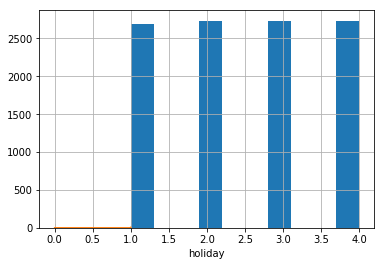

In [209]:
#column season
print data.season.value_counts()
print data.season.dtype
print '------------'
print data['season'].describe()
data['season'].hist()
sns.distplot(data['holiday'])

# Inferance

#### No null values
#### Total of 4 values 
#### 1 spring
#### 2 summer
#### 3 fall
#### 4 winter

0    10575
1      311
Name: holiday, dtype: int64
int64
------------
count    10886.000000
mean         0.028569
std          0.166599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64


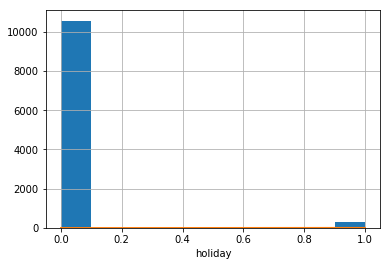

In [180]:
#column holiday
print data.holiday.value_counts()
print data.holiday.dtype
print '------------'
print data['holiday'].describe()
data['holiday'].hist()
sns.distplot(data['holiday'])
plt.show()

### Either 1 or 0
#### 1 - Holiday 
#### 0 - Not a Holiday

1    7412
0    3474
Name: workingday, dtype: int64
int64
------------
count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64


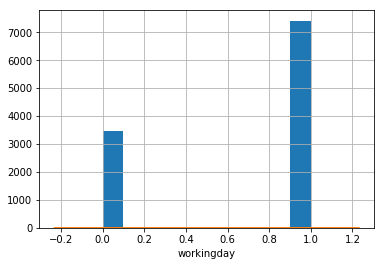

In [181]:
#column workingday
print data.workingday.value_counts()
print data.workingday.dtype
print '------------'
print data['workingday'].describe()
data['workingday'].hist()
sns.distplot(data['workingday'])
plt.show() 

### Either 1 or 0
#### 1 - working 
#### 0 - Not a working day

1.0    7193
2.0    2833
3.0     859
4.0       1
Name: weather, dtype: int64
float64
------------
count    10886.000000
mean         1.418335
std          0.633827
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weather, dtype: float64


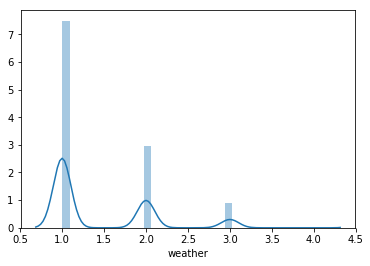

In [182]:
#column weather
print data.weather.value_counts()
print data.weather.dtype
print '------------'
print data['weather'].describe()
#data['weather'].hist()
sns.distplot(data['weather'])

0
Total different values 50
sample :
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: temp, dtype: int64
float64
------------
count    10886.000000
mean        20.239858
std          7.784046
min          0.820000
25%         13.940000
50%         20.500000
75%         26.240000
max         41.000000
Name: temp, dtype: float64


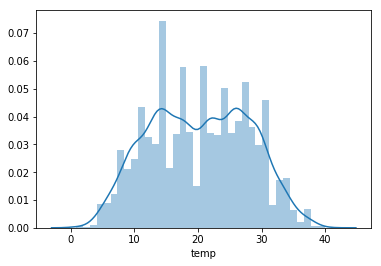

In [183]:
#column temp 
print data.temp.isna().sum()
print "Total different values",data.temp.value_counts().count()
print "sample :\n",data.temp.value_counts().head()
print data.temp.dtype
print '------------'
print data['temp'].describe()
#data['temp'].hist()
sns.distplot(data['temp'])

Text(0.5,1,u'Boxplot For temperature data')

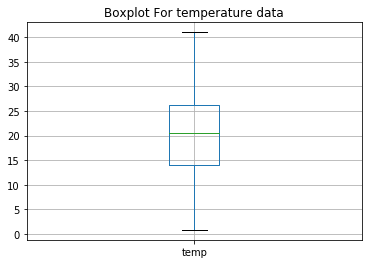

In [184]:
data.boxplot(column='temp')
plt.title('Boxplot For temperature data')

Total different values 60
sample :
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64
float64
------------
count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64


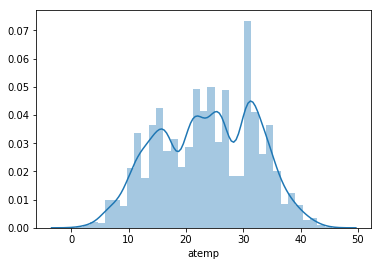

In [185]:
#column atemp          
print "Total different values",data.atemp.value_counts().count()
print "sample :\n",data.atemp.value_counts().head()
print data.atemp.dtype
print '------------'
print data['atemp'].describe()
#data['atemp'].hist()
sns.distplot(data['atemp'])

Text(0.5,1,u'Boxplot For Atemperature data')

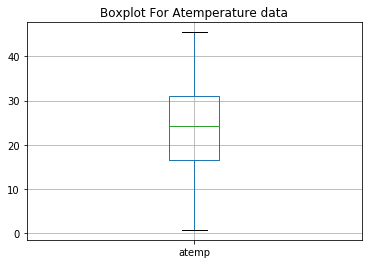

In [186]:
data.boxplot(column='atemp')
plt.title('Boxplot For Atemperature data')

Total different values 89
sample :
88    368
94    324
83    316
87    289
70    259
Name: humidity, dtype: int64
int64
------------
count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64


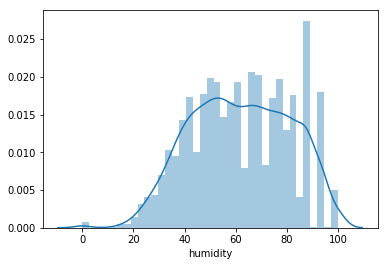

In [187]:
#column humidity          
print "Total different values",data.humidity.value_counts().count()
print "sample :\n",data.humidity.value_counts().head()
print data.humidity.dtype
print '------------'
print data['humidity'].describe()
#data['humidity'].hist()
sns.distplot(data['humidity'])

Text(0.5,1,u'Boxplot For humdity data')

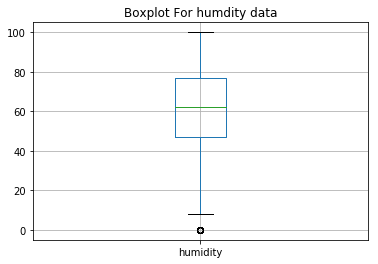

In [188]:
data.boxplot(column='humidity')
plt.title('Boxplot For humdity data')

Total different values 28
sample :
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64
float64
------------
count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64


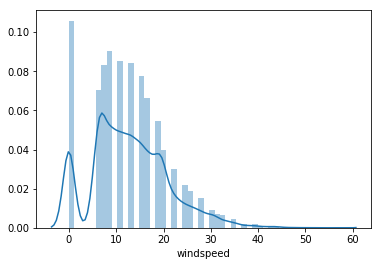

In [189]:
#column windspeed          
print "Total different values",data.windspeed.value_counts().count()
print "sample :\n",data.windspeed.value_counts().head()
print data.windspeed.dtype
print '------------'
print data['windspeed'].describe()
#data['windspeed'].hist()
sns.distplot(data['windspeed'])

Text(0.5,1,u'Boxplot For windspeed data')

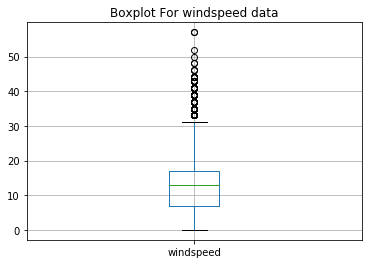

In [190]:
data.boxplot(column='windspeed')
plt.title('Boxplot For windspeed data')

# Bi-variate Analysis

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.009074  0.257379  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007049  0.000097 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033673  0.030322  0.024660   
weather     0.009074 -0.007049    0.033673  1.000000 -0.055078 -0.055193   
temp        0.257379  0.000097    0.030322 -0.055078  1.000000  0.983904   
atemp       0.264744 -0.005215    0.024660 -0.055193  0.983904  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406439 -0.065639 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007488 -0.017670 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135842  0.466750  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109364  0.318057  0.314635   
count       0.163439 -0.005393    0.011594 -0.128654  0.393929  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610 

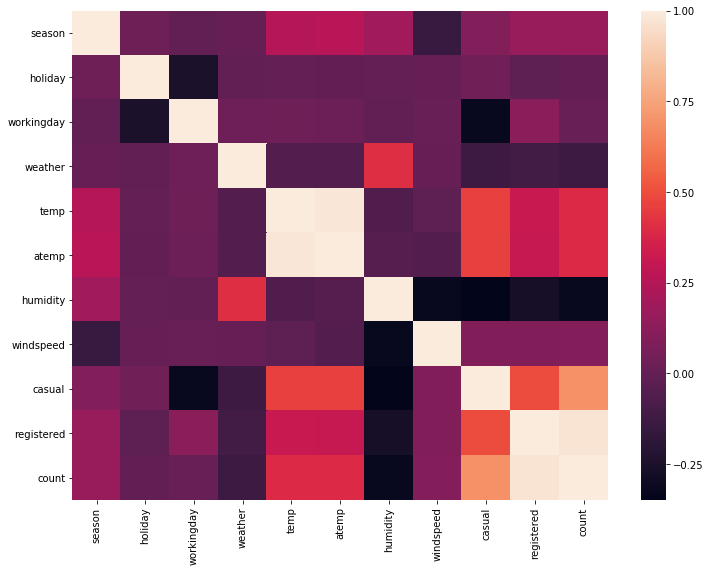

In [191]:
corr=data.corr()
print corr
plt.subplots(figsize=(12, 9))
sns.heatmap(corr)

In [21]:
data.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'], dtype=object)

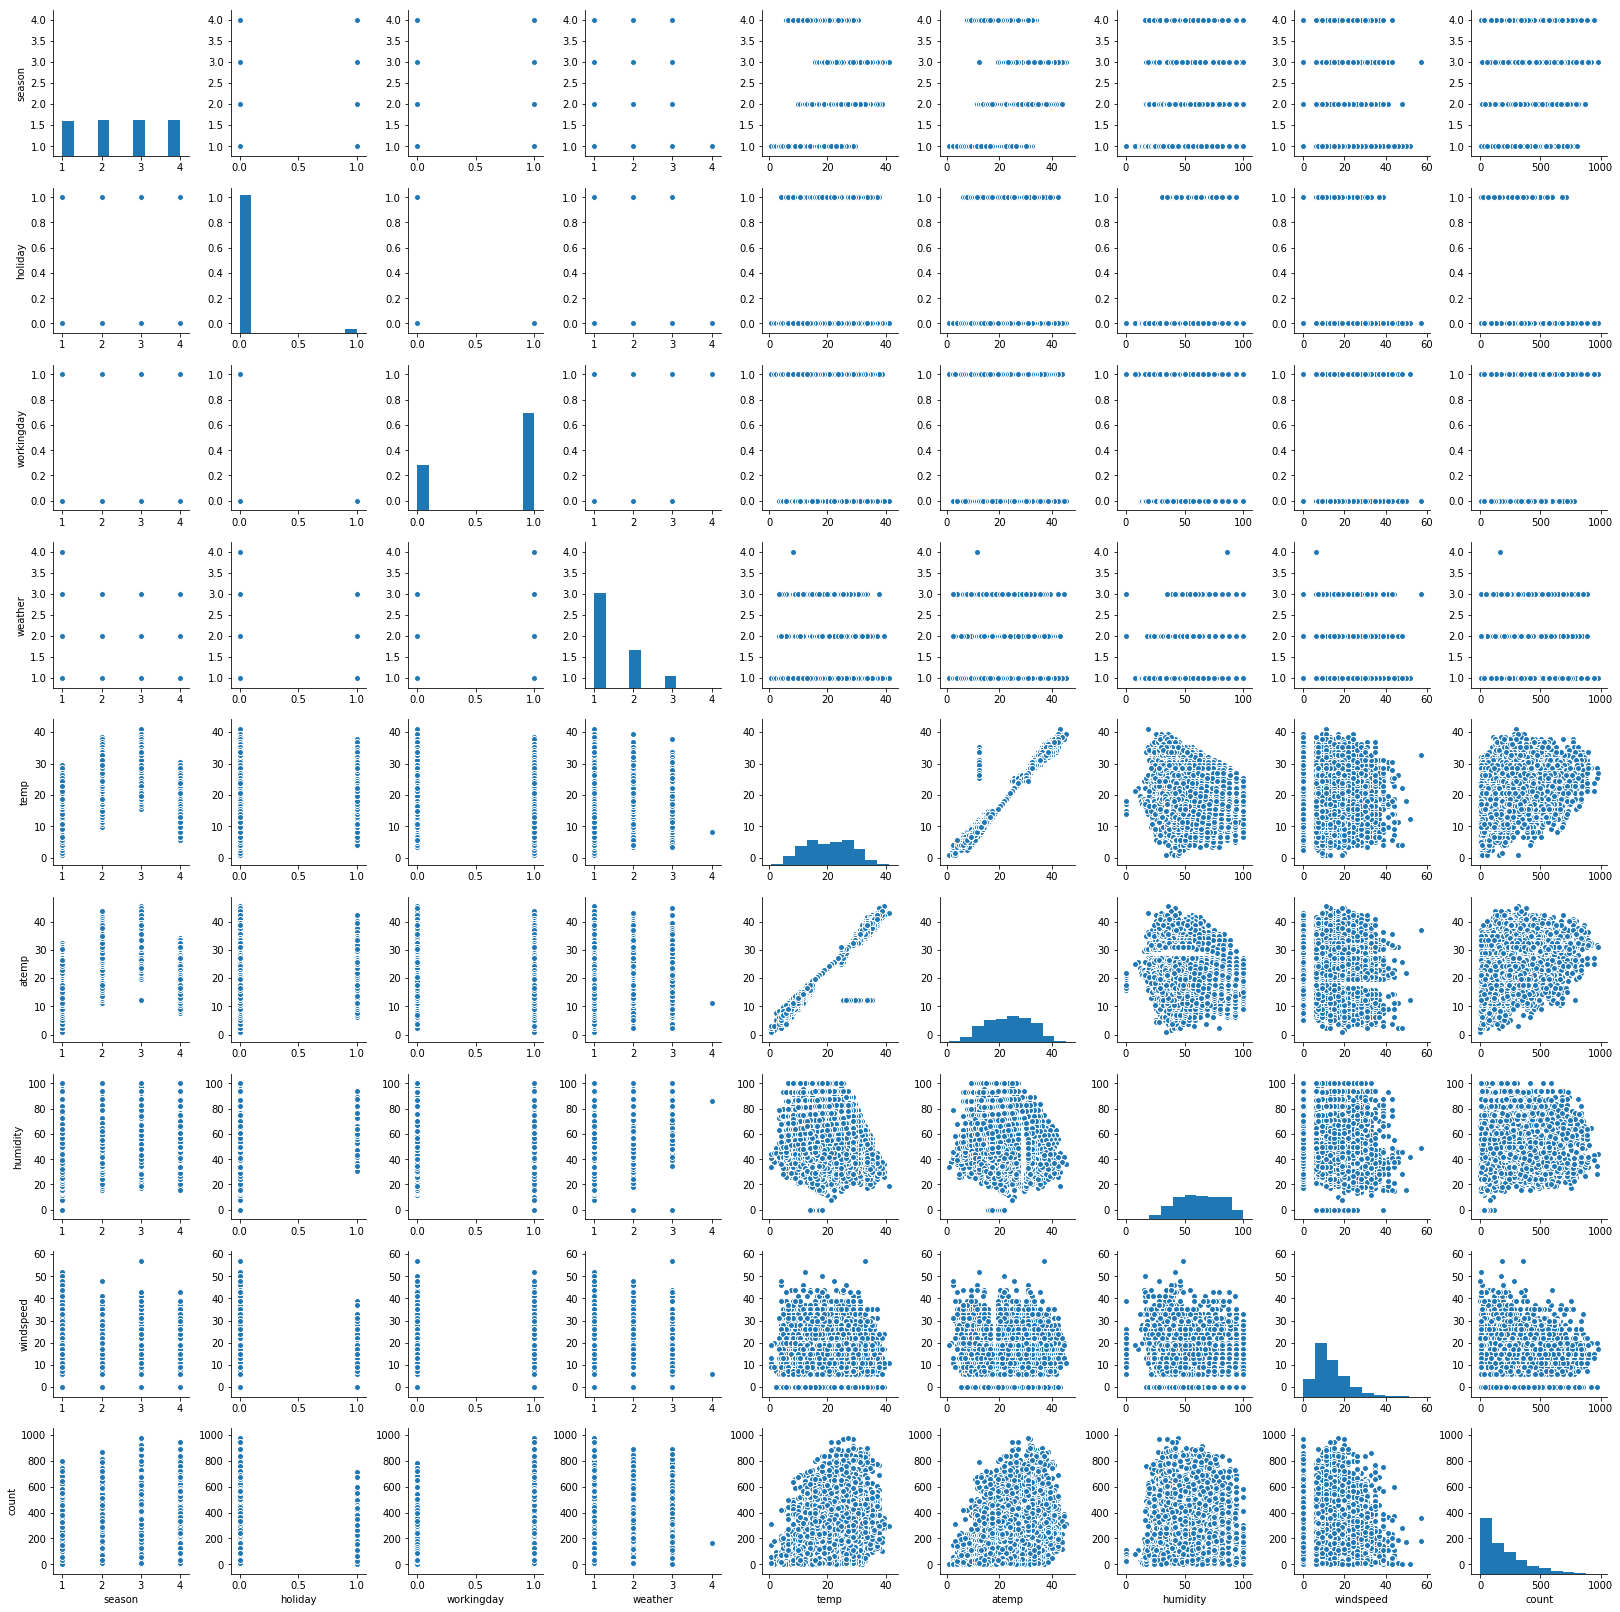

In [22]:
#scatterplot
#sns.set()
cols = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',  'count']
sns.pairplot(data[cols], size = 2.5)
plt.show()

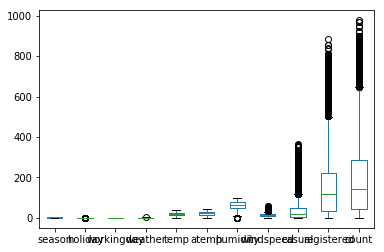

In [23]:
data.plot(kind='box')

In [24]:
data.season.astype('category')
data.holiday.astype('category')
data.workingday.astype('category')
print 'changing to category type'

changing to category type


In [25]:
import scipy.stats as scs


def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]
    return scs.chi2_contingency(result)

print(chi_square_of_df_cols(data, 'season', 'holiday'))

(20.823388178161672, 0.00011455163312609901, 3, array([[ 2609.26419254,    76.73580746],
       [ 2654.92145875,    78.07854125],
       [ 2654.92145875,    78.07854125],
       [ 2655.89288995,    78.10711005]]))


# feature engineering

In [92]:
season_dummy=pd.get_dummies(data.season,prefix='season')
data =  pd.concat([data,season_dummy], axis=1)
data.drop('season',inplace=True,axis=1)

In [93]:
data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [94]:
date = pd.to_datetime(data.datetime)

In [95]:
print '-'.join([str(date[1].month),str(date[1].year)])


1-2011


In [96]:
year=[]
month=[]
day=[]
for each_d in pd.to_datetime(data.datetime):
    year.append(each_d.year)
    month.append(each_d.month)
    day.append(each_d.day)
data['year'] = year
data['month']= month
data['day'] = day

In [97]:
data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,year,month,day
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0,2011,1,1
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0,2011,1,1
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0,2011,1,1
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0,2011,1,1
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0,2011,1,1


In [98]:
#atemp is higly correlated with temp so we can remove this
data.drop('atemp', axis=1,inplace=True)

In [100]:
data.drop('datetime', axis=1,inplace=True)
data.head()

,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,year,month,day
0,0,0,1,9.84,81,0.0,3,13,16,1,0,0,0,2011,1,1
1,0,0,1,9.02,80,0.0,8,32,40,1,0,0,0,2011,1,1
2,0,0,1,9.02,80,0.0,5,27,32,1,0,0,0,2011,1,1
3,0,0,1,9.84,75,0.0,3,10,13,1,0,0,0,2011,1,1
4,0,0,1,9.84,75,0.0,0,1,1,1,0,0,0,2011,1,1


In [105]:
from sklearn.preprocessing import StandardScaler

In [116]:
sc= StandardScaler()
transformed =sc.fit_transform(data.iloc[:,3:6])
print transformed

[[-1.33366069  0.99321305 -1.56775367]
 [-1.43890721  0.94124921 -1.56775367]
 [-1.43890721  0.94124921 -1.56775367]
 ..., 
 [-0.80742813 -0.04606385  0.26970368]
 [-0.80742813 -0.04606385 -0.83244247]
 [-0.91267464  0.21375537 -0.46560752]]


In [114]:
#transformation using formula
data.temp = data.temp.transform(lambda x: (x - x.mean()) / x.std())

In [117]:
data.head()

,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,year,month,day
0,0,0,1,-1.333599,81,0.0,3,13,16,1,0,0,0,2011,1,1
1,0,0,1,-1.438841,80,0.0,8,32,40,1,0,0,0,2011,1,1
2,0,0,1,-1.438841,80,0.0,5,27,32,1,0,0,0,2011,1,1
3,0,0,1,-1.333599,75,0.0,3,10,13,1,0,0,0,2011,1,1
4,0,0,1,-1.333599,75,0.0,0,1,1,1,0,0,0,2011,1,1


In [120]:
#values greater than 25
data[data.temp >0].head(3)

,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,year,month,day
746,0,1,1,0.139784,23,16.9979,10,43,53,1,0,0,0,2011,2,14
747,0,1,1,0.350267,22,30.0026,27,99,126,1,0,0,0,2011,2,14
748,0,1,1,0.455509,19,26.0027,27,93,120,1,0,0,0,2011,2,14


# Oulier Removal

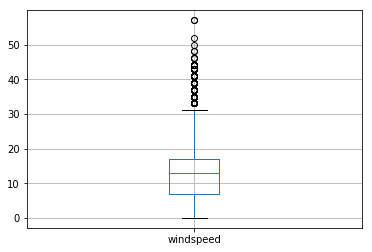

In [192]:
data.boxplot(column='windspeed')

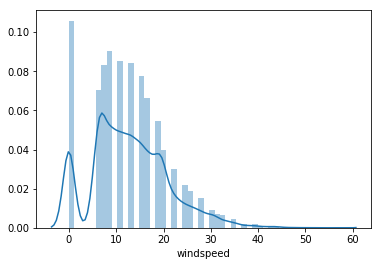

In [210]:
sns.distplot(a=data.windspeed)

In [214]:
data.loc[data.windspeed == 0, 'windspeed'] = 0.000000001
data['log_wind'] =np.log(data.windspeed)
data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_wind
0,1/1/2011 0:00,1,0,0,1.0,9.84,14.395,81,0.0010,3,13,16,-6.907755
1,1/1/2011 1:00,1,0,0,1.0,9.02,13.635,80,0.0010,8,32,40,-6.907755
2,1/1/2011 2:00,1,0,0,1.0,9.02,13.635,80,0.0010,5,27,32,-6.907755
3,1/1/2011 3:00,1,0,0,1.0,9.84,14.395,75,0.0010,3,10,13,-6.907755
4,1/1/2011 4:00,1,0,0,1.0,9.84,14.395,75,0.0010,0,1,1,-6.907755
5,1/1/2011 5:00,1,0,0,2.0,9.84,12.880,75,6.0032,0,1,1,1.792293
6,1/1/2011 6:00,1,0,0,1.0,9.02,13.635,80,0.0010,2,0,2,-6.907755
7,1/1/2011 7:00,1,0,0,1.0,8.20,12.880,86,0.0010,1,2,3,-6.907755
8,1/1/2011 8:00,1,0,0,1.0,9.84,14.395,75,0.0010,1,7,8,-6.907755
9,1/1/2011 9:00,1,0,0,1.0,13.12,17.425,76,0.0010,8,6,14,-6.907755


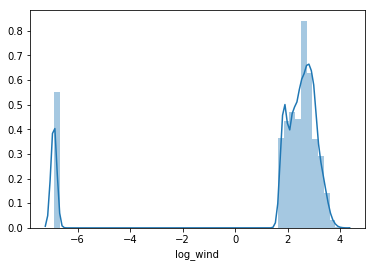

In [212]:
sns.distplot(a=data.log_wind)

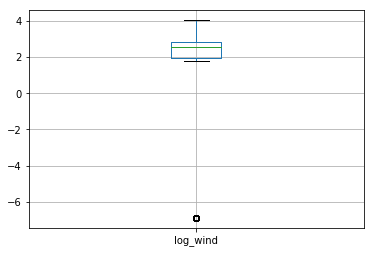

In [215]:
data.boxplot(column='log_wind')

In [217]:
q75, q25 = np.percentile(data.log_wind.dropna(), [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

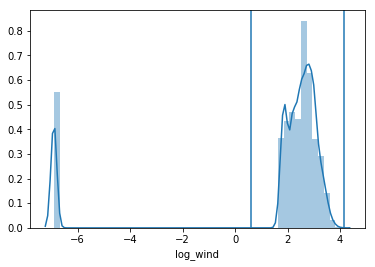

In [221]:
plt.axvline(x=min)
plt.axvline(x=max)
sns.distplot(a=data.log_wind)

In [239]:
indx=data.log_wind[(data['log_wind']>max) | (data['log_wind']<min) ].index.tolist()

In [241]:
data['log_wind'][indx] = 1

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


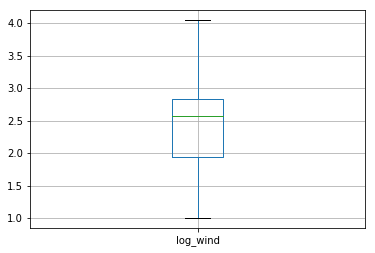

In [243]:
data.boxplot(column='log_wind')